In [12]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import urllib.request, json 


In [59]:
url = "https://hmisportal.moh.go.tz/portal-middleware-live/api/analytics.json?" \
    "dimension=ou:m0frOspS7JY;LEVEL-2&dimension=dx:lJNzLghsdKg;UxnVJil2BwF;nG4jLoeBLAN;" \
    "fdX6lREQQp0;oRbPiu3t4oc;BwXD0MzkvLG&filter=pe:{year}&includeMetadataDetails=true"

In [60]:
with urllib.request.urlopen(url.format(year=2022)) as req:
    data = json.loads(req.read().decode())
    print(url.format(year=2022))

https://hmisportal.moh.go.tz/portal-middleware-live/api/analytics.json?dimension=ou:m0frOspS7JY;LEVEL-2&dimension=dx:lJNzLghsdKg;UxnVJil2BwF;nG4jLoeBLAN;fdX6lREQQp0;oRbPiu3t4oc;BwXD0MzkvLG&filter=pe:2022&includeMetadataDetails=true


In [ ]:
key_to_name = {}

In [56]:
data['metaData']['items']['BwXD0MzkvLG']

{'uid': 'BwXD0MzkvLG',
 'name': 'Nursing Officer',
 'dimensionItemType': 'DATA_ELEMENT',
 'valueType': 'NUMBER',
 'aggregationType': 'SUM',
 'totalAggregationType': 'SUM'}

In [49]:
def find_name_for_key(data, key):
    if key in data['metaData']['items']:
        return data['metaData']['items'][key]['name']
    
    return None

In [57]:
data

{'headers': [{'name': 'dx',
   'column': 'Data',
   'valueType': 'TEXT',
   'type': 'java.lang.String',
   'hidden': False,
   'meta': True},
  {'name': 'ou',
   'column': 'Organisation unit',
   'valueType': 'TEXT',
   'type': 'java.lang.String',
   'hidden': False,
   'meta': True},
  {'name': 'value',
   'column': 'Value',
   'valueType': 'NUMBER',
   'type': 'java.lang.Double',
   'hidden': False,
   'meta': False}],
 'metaData': {'items': {'2015': {'uid': '2015',
    'code': '2015',
    'name': '2015',
    'dimensionItemType': 'PERIOD',
    'valueType': 'NUMBER',
    'totalAggregationType': 'SUM',
    'startDate': '2015-01-01T00:00:00.000',
    'endDate': '2015-12-31T00:00:00.000'},
   'RD96nI1JXVV': {'uid': 'RD96nI1JXVV',
    'code': 'TZ.WT.KM',
    'name': 'Kigoma Region',
    'dimensionItemType': 'ORGANISATION_UNIT',
    'valueType': 'NUMBER',
    'totalAggregationType': 'SUM'},
   'LGTVRhKSn1V': {'uid': 'LGTVRhKSn1V',
    'code': 'TZ.CL.SD',
    'name': 'Singida Region',
    '

In [41]:
year = 2015

In [29]:
df = pd.DataFrame(data['rows'])

In [43]:
data_prep = []

for row in data['rows']:
    data_prep.append({
        'year': year,
        'function': find_name_for_key(row[0]),
        'region': find_name_for_key(row[1]),
        'value': row[2]
    })

In [35]:
df['0_name'] = df[0].apply(find_name_for_key)
df['1_name'] = df[1].apply(find_name_for_key)

In [44]:
df2 = pd.DataFrame(data_prep)

In [61]:
dfs = []
for year in range(2013, 2023):
    with urllib.request.urlopen(url.format(year=year)) as req:
        data = json.loads(req.read().decode())
        
    data_prep = []

    for row in data['rows']:
        data_prep.append({
            'year': year,
            'function': find_name_for_key(data, row[0]),
            'region': find_name_for_key(data, row[1]),
            'value': row[2]
        })
    
    dfs.append(pd.DataFrame(data_prep))

In [74]:
df = pd.concat(dfs)
df['value'] = pd.to_numeric(df['value'])

In [76]:
df[(df['function'] == 'Nurse') & (df['region'] == 'Mara Region')]

,year,function,region,value
155,2014,Nurse,Mara Region,752.0
155,2015,Nurse,Mara Region,752.0
155,2016,Nurse,Mara Region,752.0
155,2017,Nurse,Mara Region,752.0
155,2018,Nurse,Mara Region,752.0


In [75]:
functions = list(df['function'].unique())
regions   = list(df['region'].unique())

In [81]:
functions

['Nursing Officer',
 'Clinical Assistant',
 'Clinical Officer',
 'Pharmasict',
 'Medical Officer',
 'Nurse']

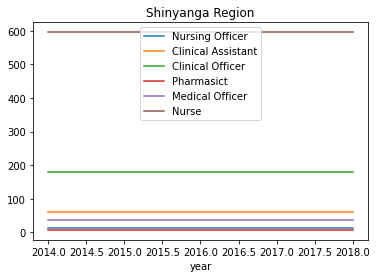

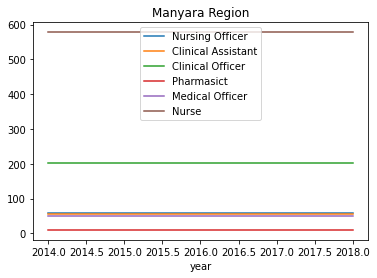

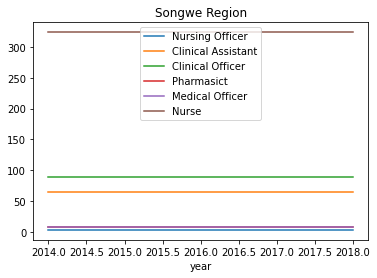

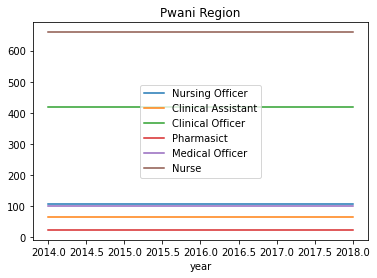

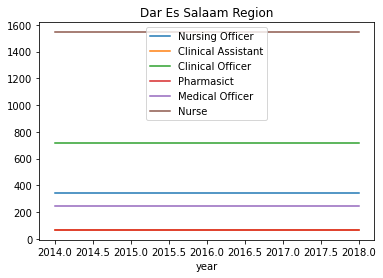

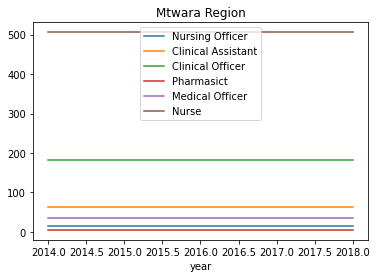

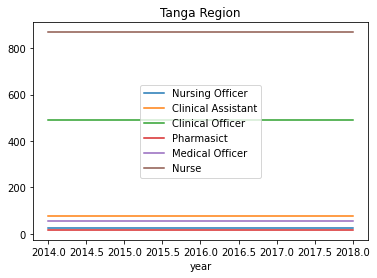

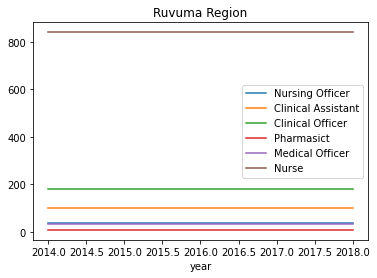

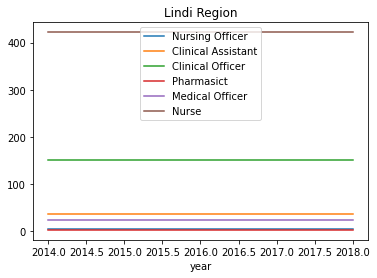

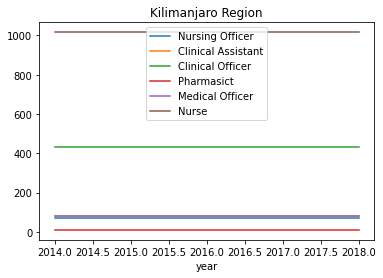

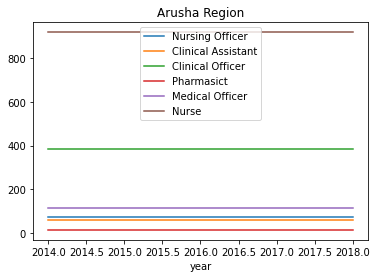

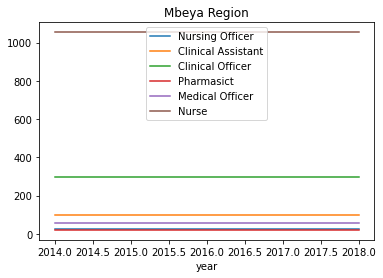

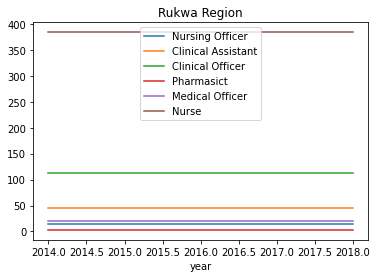

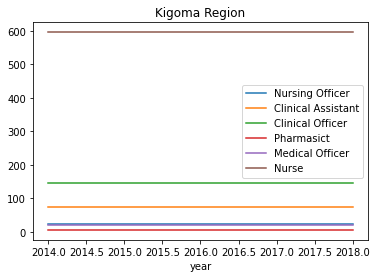

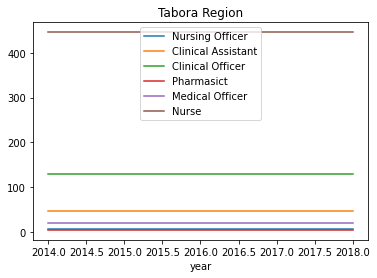

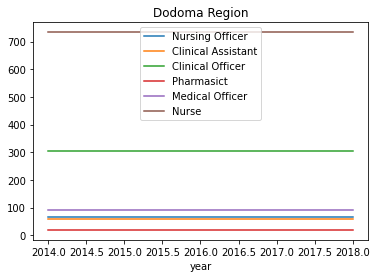

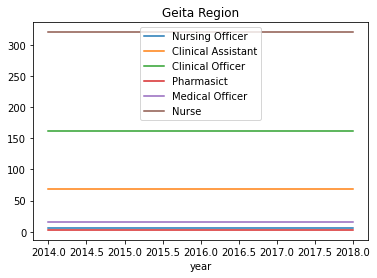

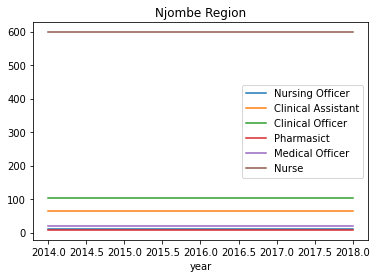

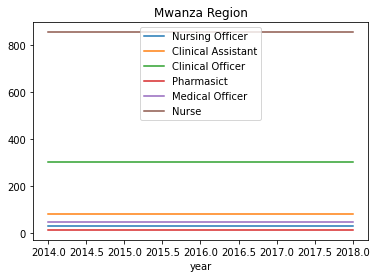

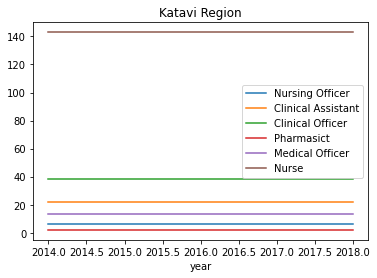

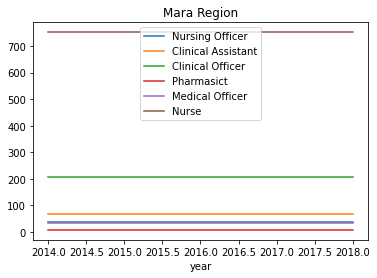

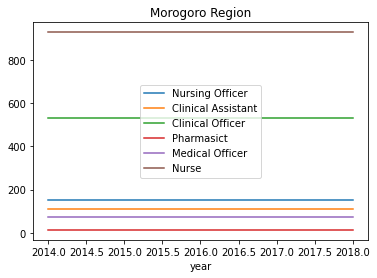

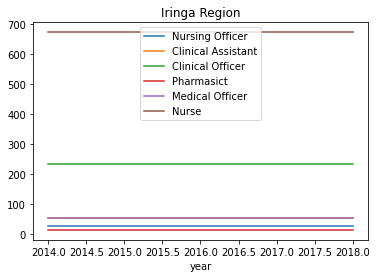

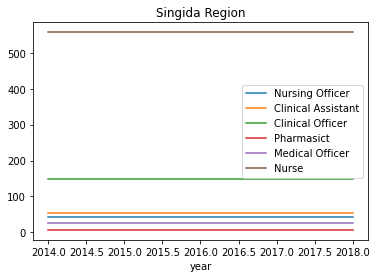

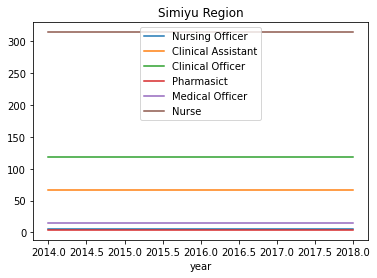

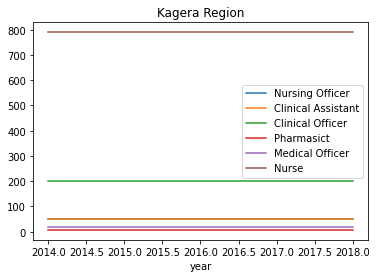

In [85]:
for r in regions:
    
    fig, ax = plt.subplots()
    
    for f in functions:
        dfx = df[(df['function'] == f) & (df['region'] == r)]
        dfx.plot(x='year', y='value', ax=ax, label=f)
        
    plt.title(f"{r}")
    plt.show()
    